In [13]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')
from managers.dataManager import DataManager

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
data = DataManager(True).all_incorporated_lag()


In [15]:
data

,REF,TIENDA,DATE,ANIO,MES,CANTIDAD,PRECIO,DESCUENTO(%),AREA,ALTO,...,DIFF_2,DIFF_3,DIFF_4,DIFF_5,DIFF_6,DIFF_7,DIFF_8,DIFF_9,DIFF_10,DIFF_11
0,XA0756:00009:,PUNTO DE VENTA POBLADO,2020-01,2020,1,4.0,250794.500000,0.500000,2484.0,89.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,XA0756:00009:,PUNTO DE VENTA SOACHA,2020-01,2020,1,0.0,200636.000000,0.500748,2484.0,89.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,XA0756:00009:,VENTAS DIGITALES,2020-01,2020,1,0.0,298445.833333,0.351574,2484.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,XA0757:00118:,ADMINISTRACION,2020-01,2020,1,0.0,250795.000000,0.349999,2484.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,XA0757:00118:,PUNTO DE VENTA LAURELES,2020-01,2020,1,0.0,250794.500000,0.500000,2484.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104710,XA0063:00029:,PUNTO DE VENTA CALI,2021-03,2021,3,0.0,255494.000000,0.700001,1848.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104711,XA0063:00029:,PUNTO DE VENTA AV 68,2021-03,2021,3,0.0,206842.000000,0.800002,1848.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104712,XA0059:00009:,PUNTO DE VENTA AV 68,2021-03,2021,3,0.0,249738.416667,0.800000,1800.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104713,XA0057:00140:,PUNTO DE VENTA PLAZA IMPERIAL,2021-03,2021,3,0.0,275058.000000,0.349999,2862.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
data2=DataManager().all_incorporated()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

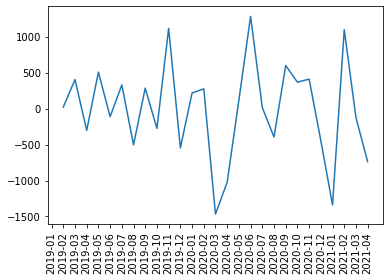

In [180]:
aux1=data2.groupby(['DATE'])['CANTIDAD'].sum().reset_index()
aux1['CANTIDAD_PASADO']=aux1['CANTIDAD'].shift(1)
aux1['DIFF']=aux1['CANTIDAD']-aux1['CANTIDAD_PASADO']
plt.plot(aux1['DATE'],aux1['DIFF'])
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

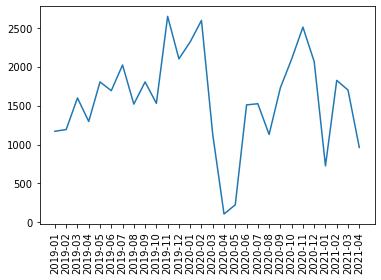

In [181]:
plt.plot(aux1['DATE'],aux1['CANTIDAD'])
plt.xticks(rotation=90)

In [124]:
for i in range(1,12):
    data['Diff_{}'.format(i)]=(data['CANTIDAD_{}'.format(i)]-data['CANTIDAD_{}'.format(1+i)])

In [190]:
data.groupby(['DATE'])

In [191]:
scaler = MinMaxScaler()
            
num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO']
for i in range(1,12):
    num_var.append('Diff_{}'.format(i))
num_var.append('CANTIDAD')
x_num=data[num_var[:-1]].astype('float')
x_num_norm = scaler.fit_transform(x_num)

cat_var=[ 'MES','TIENDA', 'PUESTOS', 'COLOR_POS', 'SUBCATEGORIA_POS', 'F_COVID' ,
        'MATERIAL_POS','ACABADO','CATEGORIA','ORIGEN'
        #quitamos anio, vigencia y estilo-validado errro casi no cambia
    ]
x_cat=data[cat_var].astype('category')
dummies = ce.one_hot.OneHotEncoder()
dummies.fit_transform(x_cat)
x_cat_dummies=dummies.fit_transform(x_cat)

x = np.append(x_num_norm,x_cat_dummies,axis=1)
y = data['CANTIDAD']
#entrenemos hasta
index = data[(data.ANIO==2021)].index[0]
date_index=data[(data.ANIO==2021)]['DATE'].values[0]
date_before=data.iloc[index-1]['DATE']
date_after=data.iloc[index+1]['DATE']

x_train = x[:index]
y_train = y[:index]
x_test = x[index:]
y_test = y[index:]

C:\Users\Johan\anaconda3\envs\ds4a\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [192]:
x.shape

(111696, 99)

In [184]:
model2 = sm.OLS(y_train, sm.add_constant(x_train,has_constant='add'))
model2=model2.fit()

In [185]:
print(mse(model2.predict(sm.add_constant(x_train,has_constant='add')),y_train),mse(model2.predict(sm.add_constant(x_test,has_constant='add')),y_test))

0.8378440263609385 4.24915176521618e+22


In [193]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model3=GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-3, 3, 10)},scoring='neg_mean_squared_error')
model3.fit(x_train,y_train)
print(mse(model3.predict(x_train),y_train),mse(model3.predict(x_test),y_test))

0.9125402805659245 0.6504613285366337


In [129]:
model4=GridSearchCV(Ridge(), param_grid={'alpha': np.logspace(-3, 3, 10)},scoring='neg_mean_squared_error')
model4.fit(x_train,y_train)
print(mse(model4.predict(x_train),y_train),mse(model4.predict(x_test),y_test))

0.8762892502049026 0.6386872948434708


In [130]:
model5=LinearRegression()
model5.fit(x_train,y_train)
print(mse(model5.predict(x_train),y_train),mse(model5.predict(x_test),y_test))

0.8780572345979358 2.0969798613045526e+27


In [194]:
df = DataManager().all_incorporated_lag()
##recuperar datos
max_index_known=df.tail(1).index[0]
max_date_known=df.tail(1)['DATE']
##futuro
#data_future=DataManager().data_forecasting_2021()
#data_future['CANTIDAD']=np.nan
#df=pd.concat([df,data_future],axis=0)
a = 'Pronostico General'
df['PREDICTED'] = model3.predict(x)
#df['PREDICTED']=model2.predict(sm.add_constant(x,has_constant='add'))
res_train = df[:index]
res_test = df[index:max_index_known+1]

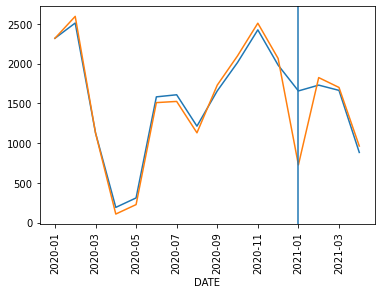

In [195]:
df.groupby(['DATE']).sum()['PREDICTED'].plot()
df.groupby(['DATE']).sum()['CANTIDAD'].plot()
plt.axvline(x=12)
plt.xticks(rotation=90)
ax=plt.gca()

In [179]:
ax.get_xticklabels()

[Text(-2.0, 0, '2021-03'),
 Text(0.0, 0, '2020-01'),
 Text(2.0, 0, '2020-03'),
 Text(4.0, 0, '2020-05'),
 Text(6.0, 0, '2020-07'),
 Text(8.0, 0, '2020-09'),
 Text(10.0, 0, '2020-11'),
 Text(12.0, 0, '2021-01'),
 Text(14.0, 0, '2021-03'),
 Text(16.0, 0, '')]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '2021-03'),
  Text(0.0, 0, '2020-01'),
  Text(2.0, 0, '2020-03'),
  Text(4.0, 0, '2020-05'),
  Text(6.0, 0, '2020-07'),
  Text(8.0, 0, '2020-09'),
  Text(10.0, 0, '2020-11'),
  Text(12.0, 0, '2021-01'),
  Text(14.0, 0, '2021-03'),
  Text(16.0, 0, '')])

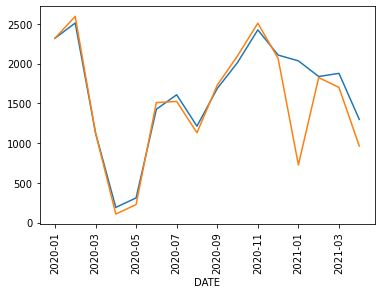

In [11]:
df.groupby(['DATE']).sum()['PREDICTED'].plot()
df.groupby(['DATE']).sum()['CANTIDAD'].plot()
plt.xticks(rotation=90)

transofmraciones data future

In [154]:
scaler = MinMaxScaler()
            
num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO']
for i in range(1,12):
    num_var.append('Diff_{}'.format(i))
num_var.append('CANTIDAD')
x_num=data[num_var[:-1]].astype('float')
x_num_norm = scaler.fit_transform(x_num)

cat_var=[ 'MES','TIENDA', 'PUESTOS', 'COLOR_POS', 'SUBCATEGORIA_POS', 'F_COVID' ,
        'MATERIAL_POS','ACABADO','CATEGORIA','ORIGEN'
        #quitamos anio, vigencia y estilo-validado errro casi no cambia
    ]
x_cat=data[cat_var].astype('category')
dummies = ce.one_hot.OneHotEncoder()
dummies.fit_transform(x_cat)
x_cat_dummies=dummies.fit_transform(x_cat)

x = np.append(x_num_norm,x_cat_dummies,axis=1)
y = data['CANTIDAD']
#entrenemos hasta
max_index = len(data)


C:\Users\Johan\anaconda3\envs\ds4a\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [155]:
model3=GridSearchCV(Lasso(), param_grid={'alpha': np.logspace(-3, 3, 10)},scoring='neg_mean_squared_error')
model3.fit(x,y)
#print(mse(model3.predict(x_train),y_train),mse(model3.predict(x_test),y_test))

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [156]:
len(data.TIENDA.unique())

14

In [157]:
pasado=DataManager().all_incorporated()
futuro=DataManager().data_forecasting_2021()

In [158]:
#len(pasado.TIENDA.unique())
len(futuro.TIENDA.unique())

14

In [159]:
join=pd.concat([pasado,futuro],axis=0).sort_values(['DATE'])
def df_lag_generator(n):
    df_lag=join.copy()
    for i in range(n):
        df_lag['CANTIDAD_{}'.format(i+1)]=df_lag.groupby(['REF','TIENDA'])[['CANTIDAD']].shift(i+1)
    return df_lag
join_lag=df_lag_generator(12).reset_index(drop=True)
aux_index=join_lag.query('DATE=="2021-05"').index[0]
join_lag_future=join_lag[aux_index:]
for i in range(1,12):
    join_lag_future['Diff_{}'.format(i)]=(join_lag_future['CANTIDAD_{}'.format(i)]-join_lag_future['CANTIDAD_{}'.format(1+i)])

<ipython-input-159-405900ceb1e1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join_lag_future['Diff_{}'.format(i)]=(join_lag_future['CANTIDAD_{}'.format(i)]-join_lag_future['CANTIDAD_{}'.format(1+i)])


In [160]:
#join_lag_future.query('REF=="D00935:00048:00048" & TIENDA == "PUNTO DE VENTA AV 68"')

In [161]:
prueba=join_lag_future.copy()

In [162]:
aux=prueba[prueba['MES']==5].copy()
x_num_i=aux[num_var[:-1]].astype('float')
#display(x_num.info())
x_num_norm_i = scaler.transform(x_num_i)
x_cat_i=aux[cat_var].astype('category')
x_cat_dummies_i=dummies.transform(x_cat_i)
#display(x_cat_dummies.isna().any().any())
x=np.append(x_num_norm_i,x_cat_dummies_i,axis=1)
aux2=model3.predict(x).round()
aux2.sum()

266.0

In [163]:
prueba=join_lag_future.copy()
meses=join_lag_future.MES.unique()
for i in meses:
    #print(i)
    aux=prueba[prueba['MES']==i].copy()
    x_num_i=aux[num_var[:-1]].astype('float')
    #display(x_num.info())
    x_num_norm_i = scaler.transform(x_num_i)
    x_cat_i=aux[cat_var].astype('category')
    x_cat_dummies_i=dummies.transform(x_cat_i)
    #display(x_cat_dummies.isna().any().any())
    x=np.append(x_num_norm_i,x_cat_dummies_i,axis=1)
    aux=model3.predict(x).round()
    for j in meses:
        if j-i==0:
            #print(aux.shape)
            prueba.loc[prueba['MES']==j,'CANTIDAD']=aux
        elif j-i>0:
            prueba.loc[prueba['MES']==j,'CANTIDAD_{}'.format(j-i)]=aux 
            prueba.loc[prueba['MES']==j,'Diff_{}'.format(j-i)]=prueba.loc[prueba['MES']==j,'CANTIDAD_{}'.format(j-i)]-prueba.loc[prueba['MES']==j,'CANTIDAD_{}'.format(j-i+1)]
    
        



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

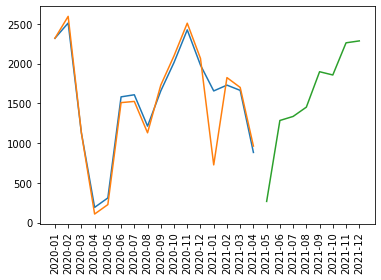

In [164]:
p1=df.groupby(['DATE']).sum()['PREDICTED'].reset_index()
p2=df.groupby(['DATE']).sum()['CANTIDAD'].reset_index()
p3=prueba.groupby(['DATE']).sum()['CANTIDAD'].reset_index()

plt.plot(p1['DATE'],p1['PREDICTED'])
plt.plot(p2['DATE'],p2['CANTIDAD'])
plt.plot(p3['DATE'],p3['CANTIDAD'])
plt.xticks(rotation=90)

In [200]:
meses

array([5, 6, 7, 8, 9, 10, 11, 12], dtype=object)

In [191]:
prueba.loc[prueba['MES']==5,'CANTIDAD']=0